# Quantium Data Virtual Internship - Part 1

In this scenario, I was part of a retail analytics team and have been approached by our client, the Category Manager for chips with a supermarket chain, who wants to better understand the types of customers who purchase chips and their purchasing behaviour within the region.

In this first part of the project, We need to present a strategic recommendation to the client that is supported by data which they can then use for the upcoming category review however to do so I need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. 

The insights from my analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
customer_behavior_raw_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/QVI_purchase_behaviour.csv')
customer_behavior_raw_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
transactions_raw_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/QVI_transaction_data.csv')
transactions_raw_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


The format of the `DATE` column is currently represented as an Excel serial number. While we can still perform analysis on this number, it is essentially just an ID, and we lose the functionality of being able to develop insights based on time. It will need to be converted to ISO date format.

In [4]:
base_date = pd.Timestamp('1899-12-31')
transactions_raw_df['NEW_DATE'] = [
    base_date + pd.DateOffset(date_offset)
    for date_offset in transactions_raw_df['DATE']
]
transactions_raw_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-18
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-15
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-21
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-18
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-19


In [5]:
customer_behavior_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
transactions_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   NEW_DATE        264836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 18.2+ MB


Neither dataframe seems to have any null values, so we can move forward with our analysis after joining both tables at `LYLTY_CARD_NBR`.

In [7]:
merged_all_df = pd.merge(transactions_raw_df, customer_behavior_raw_df, how='left', on=['LYLTY_CARD_NBR'])
merged_all_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,NEW_DATE,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-18,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-15,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-21,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-18,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-19,MIDAGE SINGLES/COUPLES,Budget


In [8]:
merged_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  int64         
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   NEW_DATE          264836 non-null  datetime64[ns]
 9   LIFESTAGE         264836 non-null  object        
 10  PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 24.2+ MB


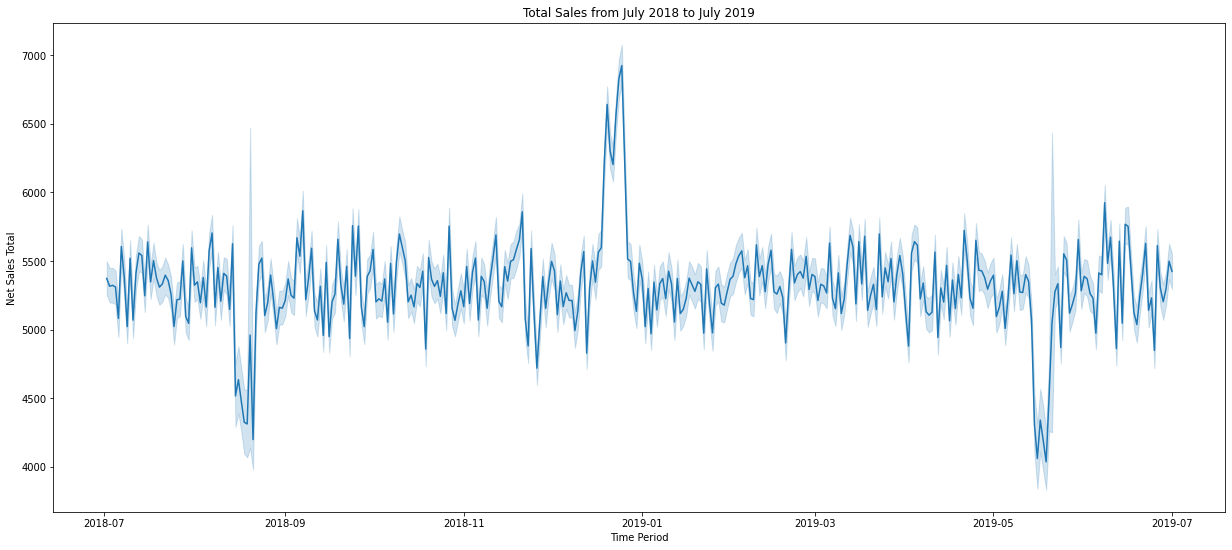

In [9]:
plt.figure(figsize = (21,9))
sns.lineplot(data = merged_all_df, x = 'NEW_DATE', y = 'TOT_SALES', estimator = sum)
plt.xlabel('Time Period')
plt.ylabel('Net Sales Total')
plt.title('Total Sales from July 2018 to July 2019')
plt.show()

There is an increase in sales around December 2018. We should take a closer look at what may have caused that.

In [10]:
df_dated = merged_all_df[(merged_all_df['NEW_DATE'] >= '2018-12-01') & (merged_all_df['NEW_DATE'] <= '2018-12-31')]
df_dated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22868 entries, 224 to 264834
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              22868 non-null  int64         
 1   STORE_NBR         22868 non-null  int64         
 2   LYLTY_CARD_NBR    22868 non-null  int64         
 3   TXN_ID            22868 non-null  int64         
 4   PROD_NBR          22868 non-null  int64         
 5   PROD_NAME         22868 non-null  object        
 6   PROD_QTY          22868 non-null  int64         
 7   TOT_SALES         22868 non-null  float64       
 8   NEW_DATE          22868 non-null  datetime64[ns]
 9   LIFESTAGE         22868 non-null  object        
 10  PREMIUM_CUSTOMER  22868 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 2.1+ MB


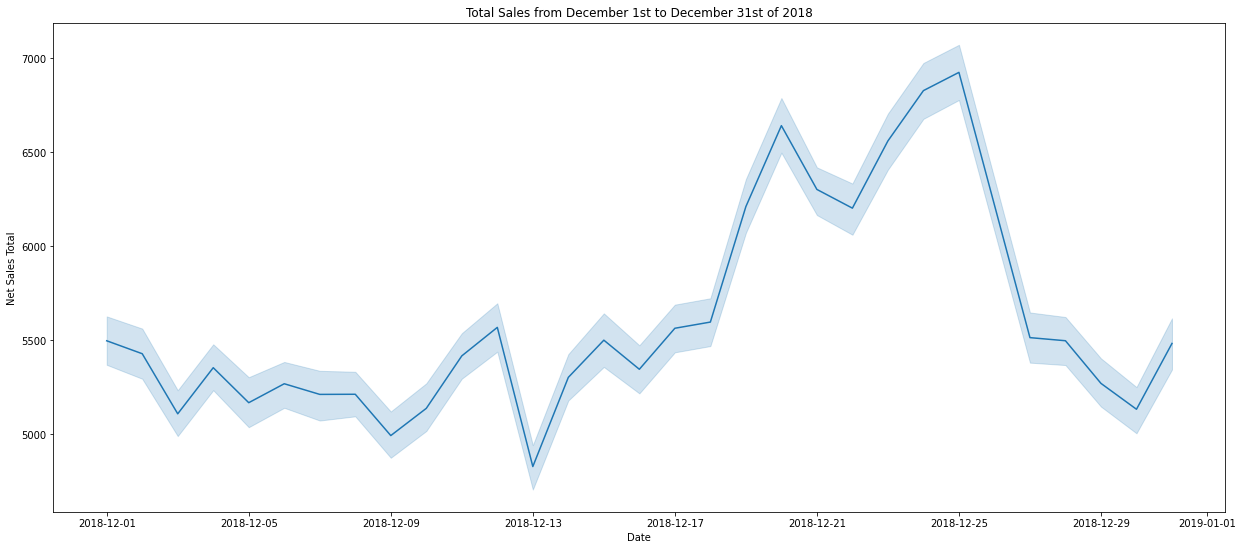

In [11]:
plt.figure(figsize = (21,9))
sns.lineplot(data = df_dated, x = 'NEW_DATE', y = 'TOT_SALES', estimator = sum)
plt.xlabel('Date')
plt.ylabel('Net Sales Total')
plt.title('Total Sales from December 1st to December 31st of 2018')
plt.show()

It would seem that Christmas is what was driving chip sales. You will notice that sales were ramping up in the days leading up to the 25th, and drastically fall off immediately after.

In [12]:
print('There are {} unique lifestages.'.format(merged_all_df['LIFESTAGE'].nunique()))
print('There are {} unique price markets.'.format(merged_all_df['PREMIUM_CUSTOMER'].nunique()))

There are 7 unique lifestages.
There are 3 unique price markets.


In [13]:
def cond_format_most(amount):
  color = 'blue' if amount > 150000 else 'red'
  return 'color: %s' % color

In [14]:
market_table = pd.pivot_table(merged_all_df, index=['PREMIUM_CUSTOMER', 'LIFESTAGE'], aggfunc={'TOT_SALES':np.sum})
market_table_cond = market_table.style.applymap(cond_format_most).format({'TOT_SALES':'${0:,.0f}'})
market_table_cond

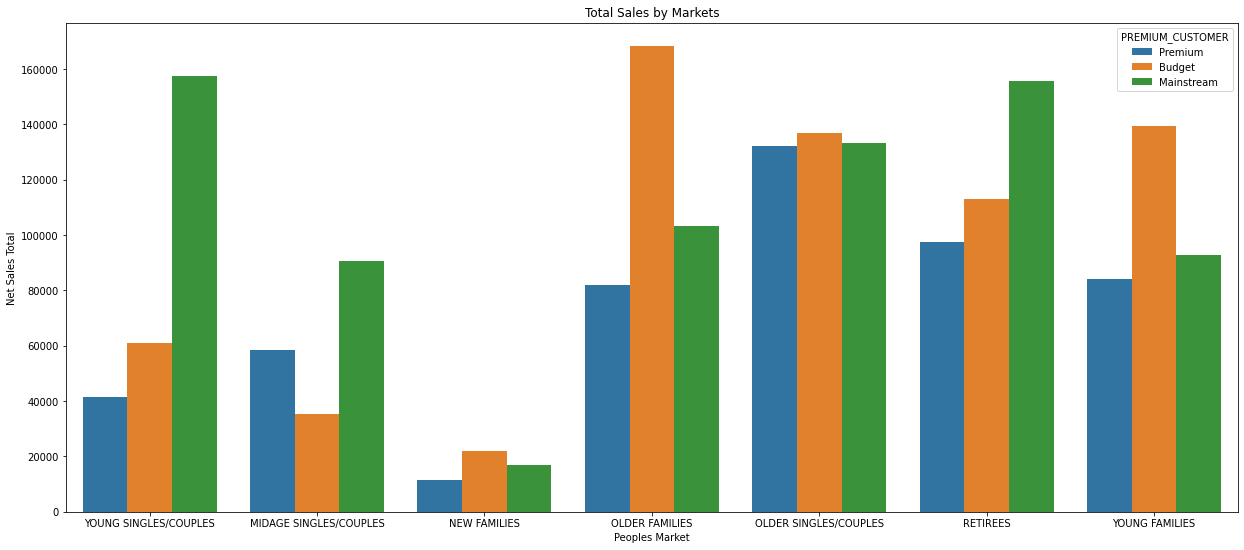

In [15]:
plt.figure(figsize=(21,9))
sns.barplot(data = merged_all_df, x = 'LIFESTAGE', y = 'TOT_SALES', hue = 'PREMIUM_CUSTOMER', ci = None, estimator = sum)
plt.xlabel('Peoples Market')
plt.ylabel('Net Sales Total')
plt.title('Total Sales by Markets')
plt.show()

Based on the pivot table and barplot above, we can determine which of the types of chips drive sales in each market.

* Mainstream chips drive the Young Singles/Couples market.
* Mainstream chips drive the Retirees market.
* Budget chips drive the Older Families market.

In [16]:
product_df = merged_all_df.groupby(['NEW_DATE', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
product_df.head()

,NEW_DATE,PROD_NAME,TOT_SALES
0,2018-07-02,Burger Rings 220g,18.4
1,2018-07-02,CCs Nacho Cheese 175g,12.6
2,2018-07-02,CCs Original 175g,31.5
3,2018-07-02,CCs Tasty Cheese 175g,44.1
4,2018-07-02,Cheetos Chs & Bacon Balls 190g,13.2


In [17]:
product_df['BRAND'] = product_df['PROD_NAME'].str.split(' ').str[0]
product_df['SIZE'] = product_df['PROD_NAME'].str[-4:]
product_df.head()

,NEW_DATE,PROD_NAME,TOT_SALES,BRAND,SIZE
0,2018-07-02,Burger Rings 220g,18.4,Burger,220g
1,2018-07-02,CCs Nacho Cheese 175g,12.6,CCs,175g
2,2018-07-02,CCs Original 175g,31.5,CCs,175g
3,2018-07-02,CCs Tasty Cheese 175g,44.1,CCs,175g
4,2018-07-02,Cheetos Chs & Bacon Balls 190g,13.2,Cheetos,190g


In [18]:
product_df.loc[product_df['BRAND'] == 'Dorito', 'BRAND'] = 'Doritos'
product_df.loc[product_df['BRAND'] == 'Smith', 'BRAND'] = 'Smiths'
product_df.loc[product_df['BRAND'] == 'Infzns', 'BRAND'] = 'Infuzions'
product_df.loc[product_df['BRAND'] == 'Snbts', 'BRAND'] = 'Sunbites'
product_df.loc[product_df['BRAND'] == 'Red', 'BRAND'] = 'RRD'
product_df.loc[product_df['BRAND'] == 'NCC', 'BRAND'] = 'Natural'
product_df.loc[product_df['BRAND'] == 'WW', 'BRAND'] = 'Woolworths'
product_df.loc[product_df['BRAND'] == 'Grain', 'BRAND'] = 'GrnWves'
product_df.loc[product_df['SIZE'] == '175G', 'SIZE'] = '175g'
product_df.loc[product_df['SIZE'] == '150G', 'SIZE'] = '150g'
product_df.head()

,NEW_DATE,PROD_NAME,TOT_SALES,BRAND,SIZE
0,2018-07-02,Burger Rings 220g,18.4,Burger,220g
1,2018-07-02,CCs Nacho Cheese 175g,12.6,CCs,175g
2,2018-07-02,CCs Original 175g,31.5,CCs,175g
3,2018-07-02,CCs Tasty Cheese 175g,44.1,CCs,175g
4,2018-07-02,Cheetos Chs & Bacon Balls 190g,13.2,Cheetos,190g


In [19]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41117 entries, 0 to 41116
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   NEW_DATE   41117 non-null  datetime64[ns]
 1   PROD_NAME  41117 non-null  object        
 2   TOT_SALES  41117 non-null  float64       
 3   BRAND      41117 non-null  object        
 4   SIZE       41117 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.6+ MB


In [20]:
print('There are {} unique brands.'.format(product_df['BRAND'].nunique()))
print('There are {} unique sizes.'.format(product_df['SIZE'].nunique()))

There are 21 unique brands.
There are 22 unique sizes.


In [21]:
brand_ptable = pd.pivot_table(product_df, index=['BRAND'], aggfunc={'TOT_SALES':np.sum})
brand_ptable_cond = brand_ptable.style.applymap(cond_format_most).format({'TOT_SALES':'${0:,.0f}'})
brand_ptable_cond

,TOT_SALES
BRAND,
Burger,"$6,831"
CCs,"$18,079"
Cheetos,"$16,884"
Cheezels,"$40,030"
Cobs,"$70,570"
Doritos,"$241,891"
French,"$7,929"
GrnWves,"$51,617"
Infuzions,"$99,048"


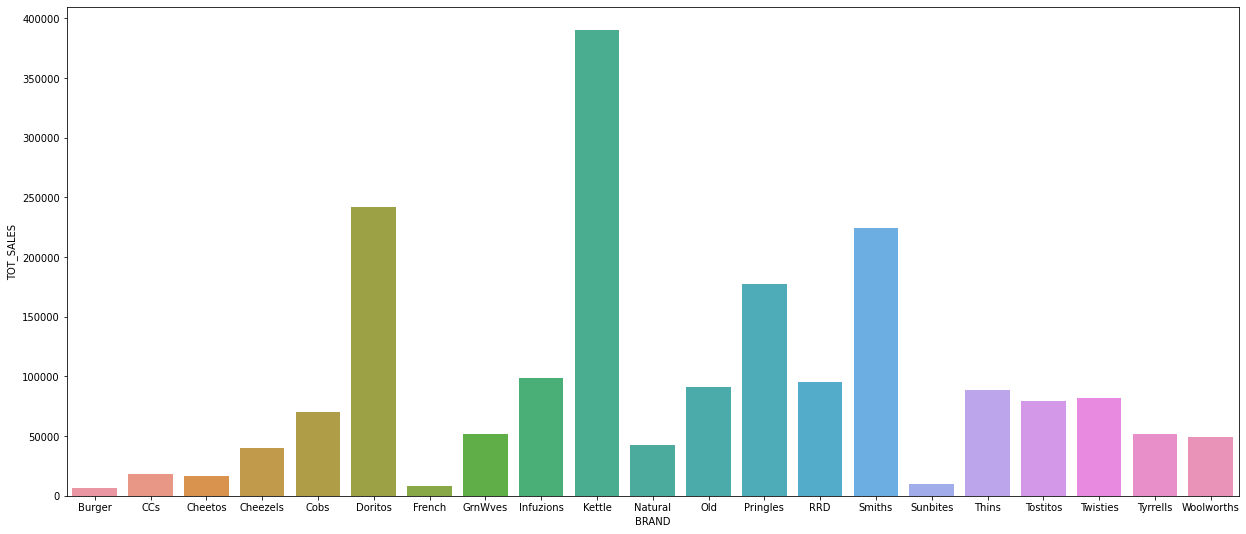

In [22]:
plt.figure(figsize=(21,9))
sns.barplot(data = product_df, x = 'BRAND', y = 'TOT_SALES', ci = None, estimator = sum)
plt.show()

Among all 21 qualified brands, the four highest grossing ones are Doritos, Kettle, Pringles, and Smiths.

In [23]:
size_ptable = pd.pivot_table(product_df, index=['SIZE'], aggfunc={'TOT_SALES':np.sum})
size_ptable_cond = size_ptable.style.applymap(cond_format_most).format({'TOT_SALES':'${0:,.0f}'})
size_ptable_cond

,TOT_SALES
SIZE,
70g,"$6,852"
90g,"$9,676"
110g,"$162,765"
125g,"$5,733"
134g,"$177,655"
150g,"$304,288"
160g,"$10,648"
165g,"$101,361"
170g,"$146,673"


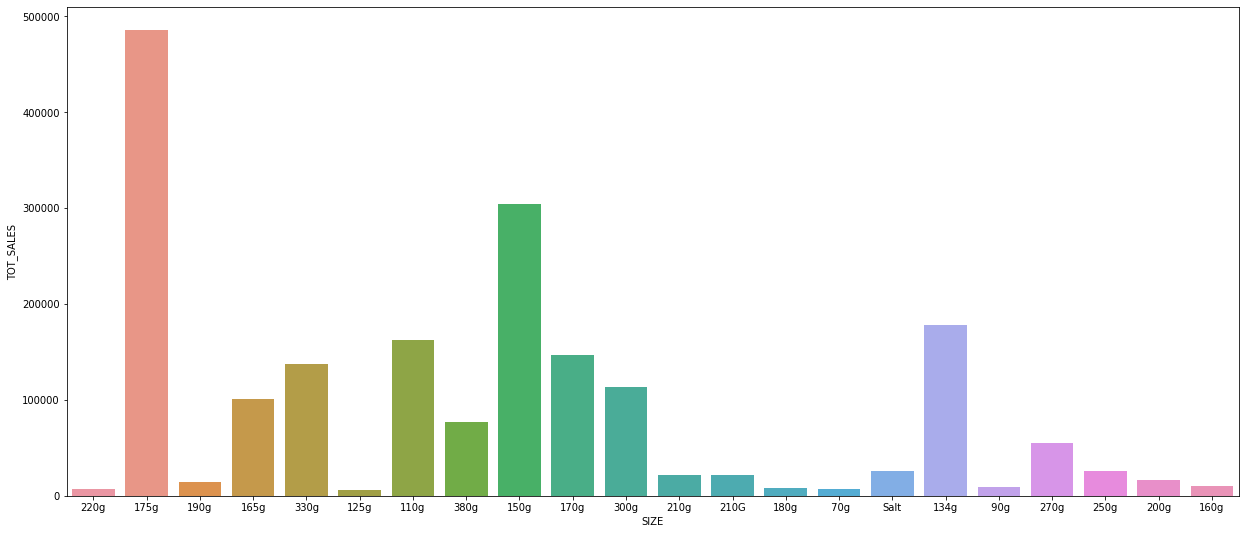

In [24]:
plt.figure(figsize=(21,9))
sns.barplot(data = product_df, x = 'SIZE', y = 'TOT_SALES', ci = None, estimator = sum)
plt.show()

Among all 22 unique sizes the 110g, 134g, 150g, and 175g sized bags are the ones that gross the most revenue.

# Part 2

For this part of the project I will be examining the performance in trial vs control stores to provide a recommendation for each location based on earlier insights.

In [25]:
qvi_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/QVI_data.csv')
qvi_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [26]:
qvi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [30]:
qvi_df['DATE'] = pd.to_datetime(qvi_df['DATE'])
qvi_df['MONTH'] = qvi_df['DATE'].dt.strftime('%m-%Y')
qvi_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10-2018
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,09-2018
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,03-2019
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,03-2019
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11-2018


The client asked to evaluate the performance of a store trial which was performed in stores 77, 86 and 88 from February 2019 to April 2019. 

First I will filter the `qvi_df` dataframe to isolate all stores that had any transactions in the trial period.

In [31]:
qvi_df = qvi_df[(qvi_df['DATE'] >= '2019-02') & (qvi_df['DATE'] < '2019-05')]
qvi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64763 entries, 2 to 264789
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LYLTY_CARD_NBR    64763 non-null  int64         
 1   DATE              64763 non-null  datetime64[ns]
 2   STORE_NBR         64763 non-null  int64         
 3   TXN_ID            64763 non-null  int64         
 4   PROD_NBR          64763 non-null  int64         
 5   PROD_NAME         64763 non-null  object        
 6   PROD_QTY          64763 non-null  int64         
 7   TOT_SALES         64763 non-null  float64       
 8   PACK_SIZE         64763 non-null  int64         
 9   BRAND             64763 non-null  object        
 10  LIFESTAGE         64763 non-null  object        
 11  PREMIUM_CUSTOMER  64763 non-null  object        
 12  MONTH             64763 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 6.9+ MB

In [32]:
def kpi_metrics(df):
  monthly_sales = pd.pivot_table(df, index= ['MONTH', 'STORE_NBR'], aggfunc={'TOT_SALES':np.sum})
  monthly_customers = pd.pivot_table(df, index= ['MONTH', 'STORE_NBR'], values = ['LYLTY_CARD_NBR', 'TXN_ID',], aggfunc=pd.Series.nunique)
  monthly_customers['TXN_PER_CUST_ID'] = monthly_customers['TXN_ID'] / monthly_customers['LYLTY_CARD_NBR']
  kpi_table = pd.merge(monthly_sales, monthly_customers, how = 'left', on = ['MONTH', 'STORE_NBR'])
  return kpi_table

In [33]:
trial_store_df = qvi_df[qvi_df['STORE_NBR'].isin([77, 86, 88])]
trial_store_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03-2019
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04-2019
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02-2019
73372,77003,2019-03-18,77,74917,80,Natural ChipCo Sea Salt & Vinegr 175g,1,3.0,175,NATURAL,OLDER FAMILIES,Mainstream,03-2019
73377,77007,2019-03-20,77,74923,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER SINGLES/COUPLES,Premium,03-2019


In [34]:
kpi_metrics(trial_store_df)

TOT_SALES  LYLTY_CARD_NBR  TXN_ID  TXN_PER_CUST_ID
MONTH   STORE_NBR                                                    
02-2019 77             235.0              45      45         1.000000
        86             913.2             107     138         1.289720
        88            1370.2             124     153         1.233871
03-2019 77             278.5              50      55         1.100000
        86            1026.8             115     140         1.217391
        88            1477.2             134     169         1.261194
04-2019 77             263.5              47      48         1.021277
        86             848.2             105     126         1.200000
        88            1439.4             128     162         1.265625

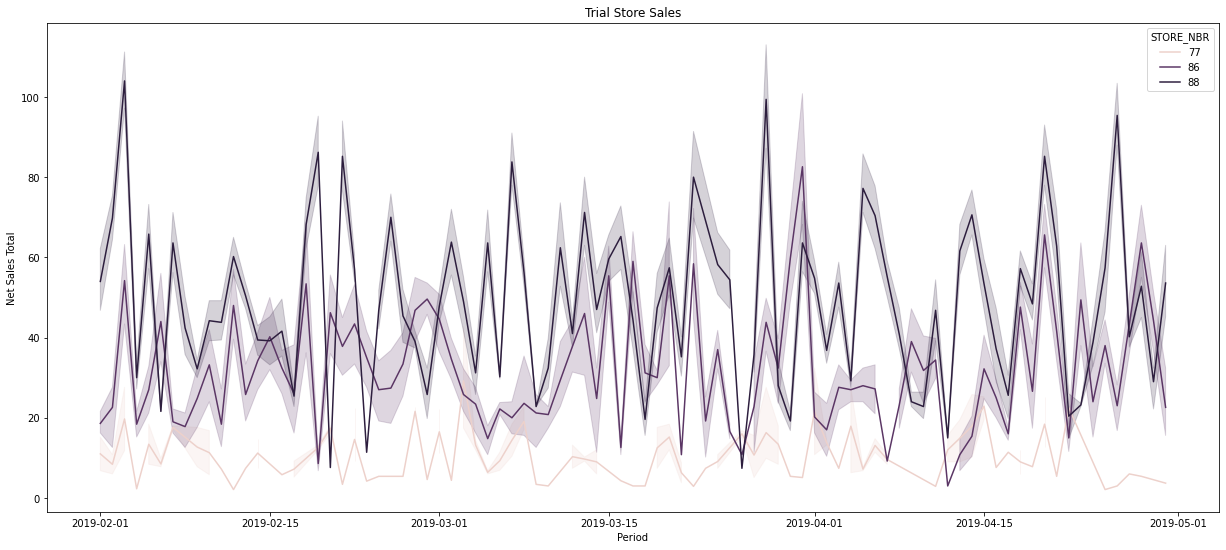

In [35]:
plt.figure(figsize = (21,9))
sns.lineplot(data = trial_store_df, x = 'DATE', y = 'TOT_SALES', hue = 'STORE_NBR', estimator = sum)
plt.xlabel('Period')
plt.ylabel('Net Sales Total')
plt.title('Trial Store Sales')
plt.show()

In [ ]:
## On the next episode, you will need to create a correlation function to find which other store IDs are closely related to the trial group